In [1]:
from keras.datasets import cifar10

### CIFAR-10 데이터셋 다운받기

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

### CIFAR-10 데이터 그려보기

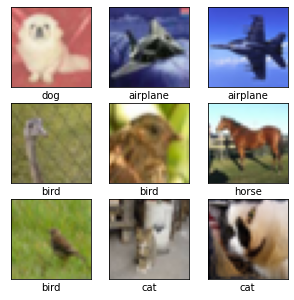

In [7]:
np.random.seed(777)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sample_size = 9
random_idx = np.random.randint(50000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx], cmap='gray')
  plt.xlabel(class_names[int(y_train[idx])])
plt.show()

### CIFAR-10 데이터셋 전처리 과정

In [8]:
# 채널별로 평균과 표준편차 구하기기
x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train, axis = (0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [9]:
x_train.min(), x_train.max()

(-1.98921279913639, 2.1267894095169213)

In [10]:
np.mean(x_train)

5.2147915615326686e-17

In [11]:
np.round(np.mean(x_train),1)

0.0

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [14]:
x_train.shape,x_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3))

In [15]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

In [17]:
from keras import activations
from pyparsing import actions
model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)),
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy',metrics=['acc'])

In [18]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 16s 7ms/step - loss: 1.6539 - acc: 0.4047 - val_loss: 1.4130 - val_acc: 0.4871
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2898 - acc: 0.5387 - val_loss: 1.2232 - val_acc: 0.5573
Epoch 3/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1068 - acc: 0.6098 - val_loss: 1.0855 - val_acc: 0.6133
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9706 - acc: 0.6607 - val_loss: 0.9639 - val_acc: 0.6596
Epoch 5/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8592 - acc: 0.7013 - val_loss: 0.9237 - val_acc: 0.6754
Epoch 6/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7707 - acc: 0.7312 - val_loss: 0.8924 - val_acc: 0.6841
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.6953 - acc: 0.7583 - val_loss: 0.8673 - val_acc: 0.7007
Epoch 8/30
1094/1094 [==============================] - 11

### 신경망 시각화해보기
* 딥러닝 신경망의 큰 단점 중 하나는 모델을 쉽게 해석할 수 없다는 것.
* 의료나 금융에서는 소비자에게 설명 못하는 게 큰 단점
* 설명 가능한 AI(XAI:eXplainable AI) : 모델을 설명하기 위해 등장한 개념
* 모델이 학습한 특징을 시각화하는 게 하나의 방법이 될 수 있음
* 특성맵을 시각화해보는 작업 실습

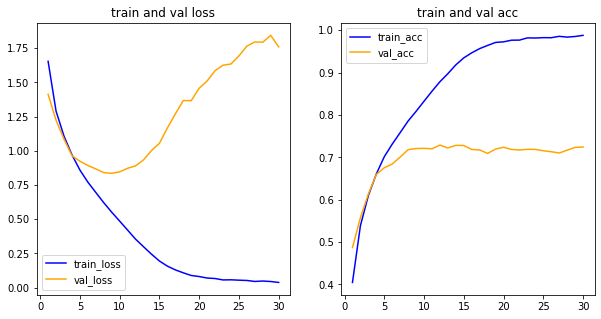

In [27]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.legend()

plt.show()

['conv2d',
 'conv2d_1',
 'max_pooling2d',
 'conv2d_2',
 'conv2d_3',
 'max_pooling2d_1',
 'conv2d_4',
 'conv2d_5',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1']

In [22]:
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by l

In [23]:
x_test[1].shape

(32, 32, 3)

In [24]:
visual_model = tf.keras.models.Model(inputs=model.input,outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
test_img.shape

(1, 32, 32, 3)

In [25]:
feature_maps = visual_model.predict(test_img)
feature_maps

1/1 [==============================] - 0s 237ms/step


[array([[[[0.18011117, 0.11986867, 0.23904455, ..., 0.        ,
           1.4439832 , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.86897767, 0.70823   ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.88578975, 0.6867199 ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.8950615 , 0.6905974 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.88368636, 0.70329475],
          [0.        , 0.        , 0.        , ..., 0.31707034,
           0.15861881, 1.4167318 ]],
 
         [[0.4532425 , 0.30219433, 0.538186  , ..., 0.        ,
           0.5639302 , 0.        ],
          [0.01972118, 0.        , 0.        , ..., 0.        ,
           0.        , 0.17004783],
          [0.03296987, 0.        , 0.        , ..., 0.        ,
           0.        , 0.15299805],
          ...,
          [0.03670212, 0.        , 0.        , ..., 0.        ,
   

<ipython-input-26-24ed10875a76>:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


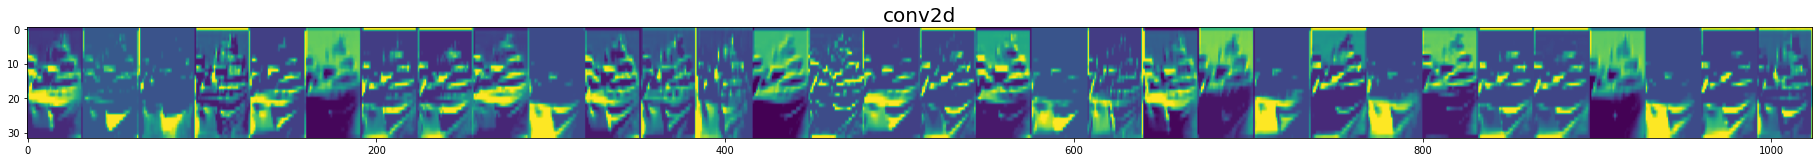

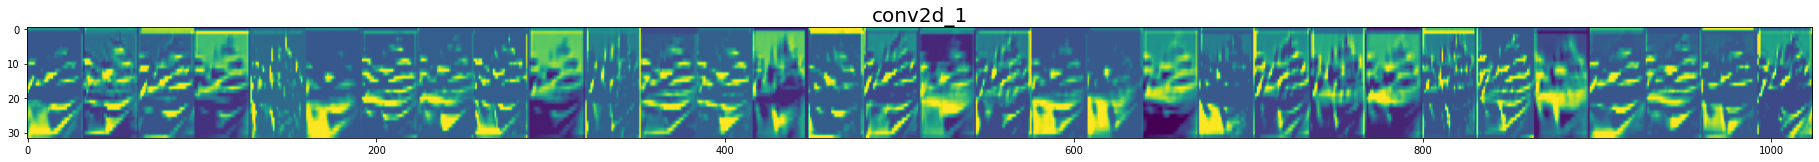

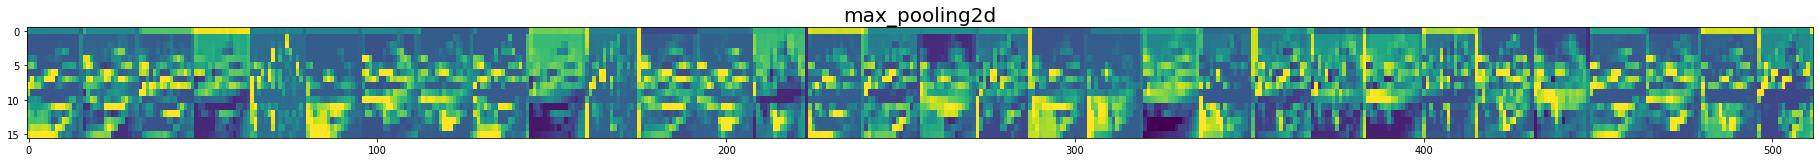

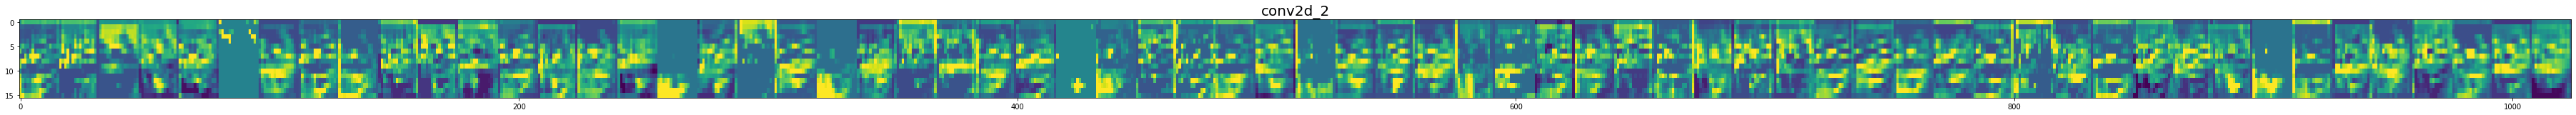

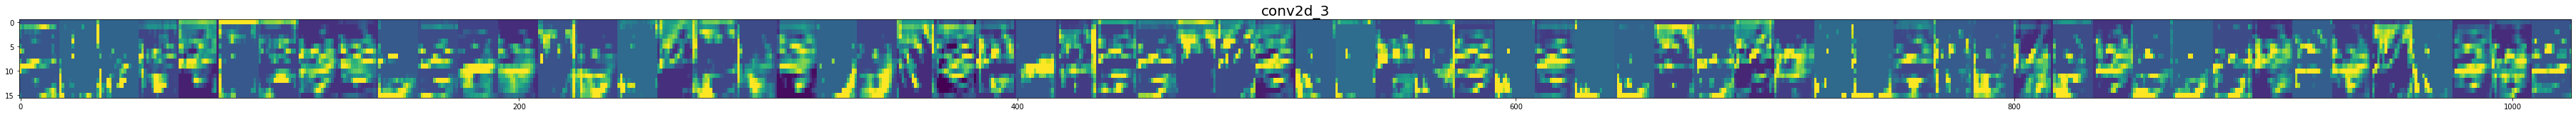

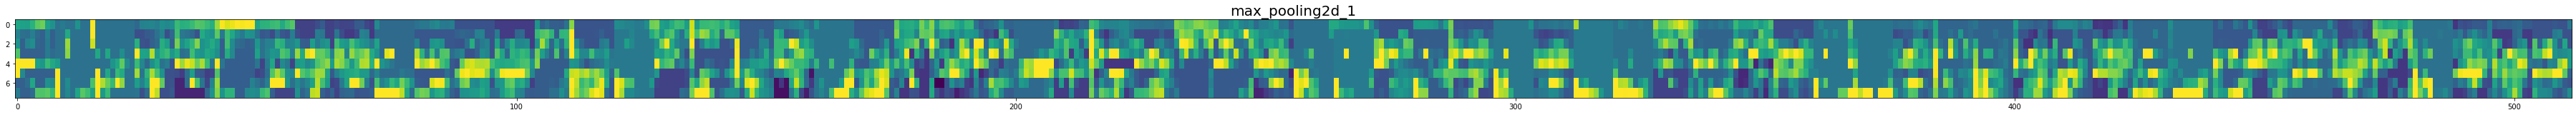

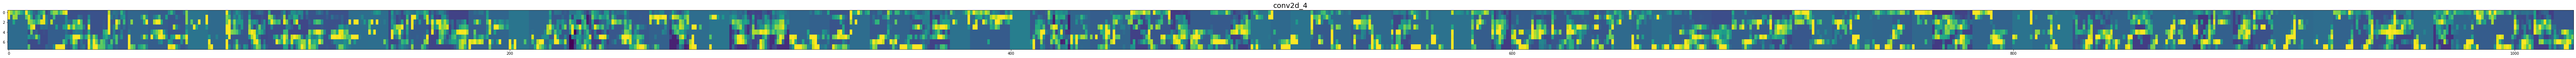

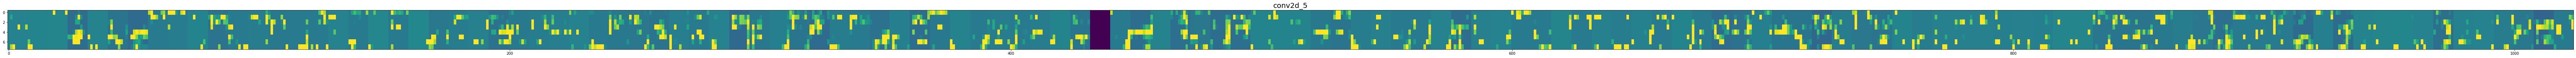

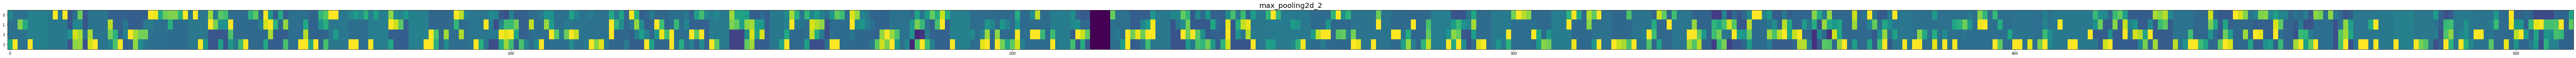

In [26]:
for layer_name,feature_map in zip(get_layer_name,feature_maps):
  # Dense층은 제외
  if (len(feature_map.shape)==4):
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]
    display_grid = np.zeros((img_size,img_size*features))
    # 각 특성맵을 이어붙여서 반복함.
    for i in range(features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*img_size:(i+1)*img_size] = x # 그리드에 특성맵을 한장씩 붙이는 위치를 지정해준다.
    plt.figure(figsize=(features,2+1./features))
    plt.title(layer_name,fontsize=20)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto')